# **Statistical Learning for Automation Systems**

       
## *Prof. Simone Formentin*

___

# Regression with Neural Networks - Case Study

## Problem Statement

Let's consider a dataset containing measurements related to some rare gem stones, with 2 measured features and the sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

## Import Data Analysis and Visualization Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Import Dataset

In [2]:
df = pd.read_csv('gem_stones.csv')            # Import Dataset from .csv

In [3]:
df.head()                                     # Show header

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


## Exploratory Data Analysis

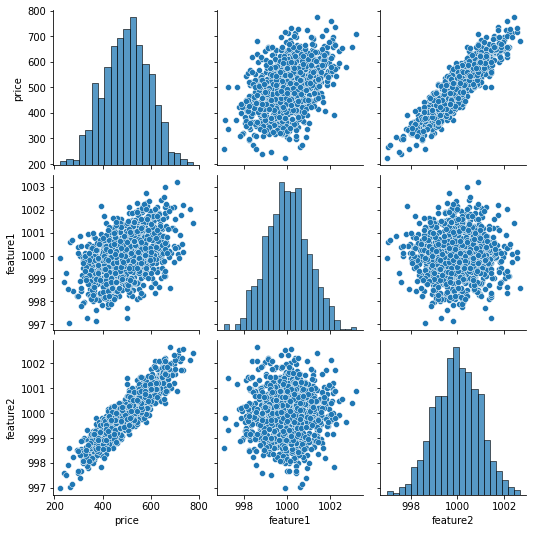

In [6]:
sns.pairplot(df)

An approximated linear relationship is fairly evident between feature2 and price.

## Test/Train Set Split

In [7]:
from sklearn.model_selection import train_test_split        # Import train_test_split function from Scikit-Learn

In [8]:
# Convert columns of Pandas DataFrame to Numpy arrays

# Features
X = np.array(df[['feature1','feature2']])

# Target Variable
y = np.array(df['price'].values)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
y_train.shape

(700,)

In [12]:
y_test.shape

(300,)

## Data Pre-Processing

Use StandardScaler() to perform input centering and input normalization.

Notice that it is sufficient to standardize just input features, while it is not necessary to standardize the target variable.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like s

In [15]:
scaler = StandardScaler()                    # StandardScaler() object instantiation

Notice: to prevent data leakage from the test set, we only fit our scaler on the training set.

In [16]:
scaler.fit(X_train)                          # Fit Standard Scaler only on the training set

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)          # Apply Standardization on X_train
X_test = scaler.transform(X_test)            # Apply Standardization on X_test

## Neural Network Definition - TensorFlow & Keras

There are several ways you can import Keras from Tensorflow. We will use the method shown in the **official TF documentation**.

In [18]:
import tensorflow as tf

## Creating a NN Model

There are two ways to create MM models through the TensorFlow - Keras API: passing in a list of layers all at once or add them one by one. Let's show both methods.

In [19]:
from tensorflow.keras.models import Sequential               # Import Sequential() to instatiate a Feed-forward NN object
from tensorflow.keras.layers import Dense                    # Import Dense() to instatiate fully-connected layer objects

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

### NN Model - Specify a list of layers

In [21]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])                              # Drawback: more difficult to modify the architecture (you should remove layers from the list)

### NN Model - Adding layers one by one

In [22]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

# Advantage: easy to modify the architecture (you can just comment out the layers that you want to remove)

Let's go ahead and build a simple model and then compile it by defining our solver

In [23]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4 ,activation='relu'))

# Final output node for prediction
model.add(Dense(1))                           # In the output layer we just have one neuron since the target is a single variable (price)

model.compile(optimizer='rmsprop', loss='mse')      # Optimizer determines the way in which you approach gradient descent (alternative: ADAM)

### Choosing suitable Loss functions and Evaluation Metrics

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics='accuracy')

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics='accuracy')

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

## Training NN Model

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [24]:
model.fit(X_train, y_train, epochs=250)        

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 2ms/sample - loss: 256406.3562
Epoch 2/250
700/700 [==============================] - 0s 79us/sample - loss: 256249.1756
Epoch 3/250
700/700 [==============================] - 0s 90us/sample - loss: 256093.1895
Epoch 4/250
700/700 [==============================] - 0s 90us/sample - loss: 255922.6166
Epoch 5/250
700/700 [==============================] - 0s 89us/sample - loss: 255739.2342
Epoch 6/250
700/700 [==============================] - 0s 92us/sample - loss: 255537.7802
Epoch 7/250
700/700 [==============================] - 0s 96us/sample - loss: 255319.6933
Epoch 8/250
700/700 [==============================] - 0s 94us/sample - loss: 255082.1167
Epoch 9/250
700/700 [==============================] - 0s 90us/sample - loss: 254822.9817
Epoch 10/250
700/700 [==============================] - 0s 116us/sample - loss: 254542.2673
Epoch 11/250
700/700 [==============================] - 0s 116us/sample - loss

700/700 [==============================] - 0s 125us/sample - loss: 166.7060
Epoch 181/250
700/700 [==============================] - 0s 132us/sample - loss: 157.8293
Epoch 182/250
700/700 [==============================] - 0s 131us/sample - loss: 150.3862
Epoch 183/250
700/700 [==============================] - 0s 148us/sample - loss: 143.5232
Epoch 184/250
700/700 [==============================] - 0s 152us/sample - loss: 135.4333
Epoch 185/250
700/700 [==============================] - 0s 138us/sample - loss: 129.1303
Epoch 186/250
700/700 [==============================] - 0s 128us/sample - loss: 122.7109
Epoch 187/250
700/700 [==============================] - 0s 136us/sample - loss: 116.3736
Epoch 188/250
700/700 [==============================] - 0s 147us/sample - loss: 111.3740
Epoch 189/250
700/700 [==============================] - 0s 169us/sample - loss: 106.5668
Epoch 190/250
700/700 [==============================] - 0s 221us/sample - loss: 101.7888
Epoch 191/250
700/700 [=

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [25]:
model.history.history

{'loss': [256406.35625,
  256249.175625,
  256093.1894642857,
  255922.61660714285,
  255739.23419642856,
  255537.78017857144,
  255319.69330357143,
  255082.11669642857,
  254822.9816964286,
  254542.26732142858,
  254238.38803571428,
  253910.85258928573,
  253557.41696428572,
  253174.40839285715,
  252762.65705357143,
  252321.665,
  251844.47392857142,
  251331.5725892857,
  250782.7244642857,
  250187.4705357143,
  249543.72294642858,
  248850.3455357143,
  248104.5305357143,
  247293.08910714285,
  246418.043125,
  245480.13160714286,
  244487.08875,
  243434.7442857143,
  242328.29125,
  241155.789375,
  239910.58696428573,
  238613.25794642858,
  237251.37375,
  235806.8249107143,
  234286.01348214285,
  232690.06419642858,
  231028.92419642856,
  229282.2780357143,
  227466.57857142857,
  225555.71392857144,
  223562.93866071428,
  221482.22910714286,
  219323.30866071428,
  217083.20017857142,
  214772.35285714286,
  212353.224375,
  209839.23553571428,
  207255.05089285714

In [26]:
loss = model.history.history['loss']

Text(0, 0.5, 'Training Loss Function (MSE)')

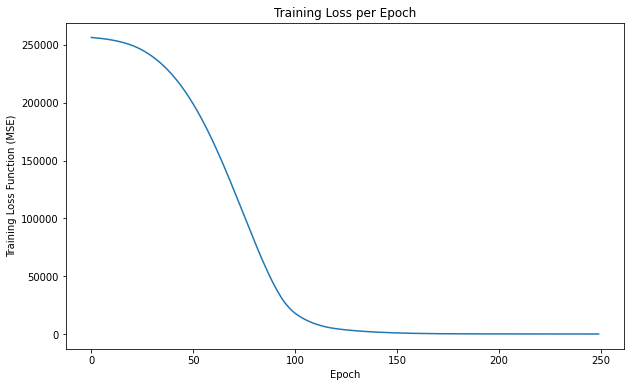

In [27]:
# Plot Training Loss per Epoch

plt.figure(figsize=(10,6))

sns.lineplot(x=range(len(loss)),y=loss)

plt.title("Training Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Training Loss Function (MSE)')

## Loss evaluation on Training set and Test set.

These should hopefully be fairly close to each other.

In [28]:
model.metrics_names

['loss']

In [29]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [30]:
training_score                   # MSE on the Training Set

29.424981929234097

In [31]:
test_score                       # MSE on the Test Set

41.42617045084636

### Further Evaluations

In [32]:
test_predictions = model.predict(X_test)

In [33]:
test_predictions

array([[404.96576],
       [623.79266],
       [592.31915],
       [572.30396],
       [372.19498],
       [579.30383],
       [514.9454 ],
       [458.9558 ],
       [549.2636 ],
       [447.3433 ],
       [612.00964],
       [549.07666],
       [418.80685],
       [408.5377 ],
       [651.6472 ],
       [437.08142],
       [508.46387],
       [660.2164 ],
       [662.9122 ],
       [565.6675 ],
       [333.67703],
       [444.60995],
       [382.1138 ],
       [378.36447],
       [566.69257],
       [610.77167],
       [532.39185],
       [427.60327],
       [655.7371 ],
       [413.81067],
       [442.4404 ],
       [485.0156 ],
       [438.1839 ],
       [682.22144],
       [424.53503],
       [417.36328],
       [501.94016],
       [550.5419 ],
       [509.6277 ],
       [394.9353 ],
       [618.8482 ],
       [416.35678],
       [604.6662 ],
       [445.79745],
       [501.9198 ],
       [581.9411 ],
       [669.43555],
       [490.3338 ],
       [318.06042],
       [485.30838],


In [34]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [35]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [36]:
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

pred_df

,Test Y,Model Predictions
0,402.296319,404.965759
1,624.156198,623.792664
2,582.455066,592.319153
3,578.588606,572.303955
4,371.224104,372.194977
...,...,...
295,525.704657,529.014465
296,502.909473,552.602661
297,612.727910,609.876526
298,417.569725,416.697449


## Real Test Set Labels vs NN Model Predictions

Text(0.5, 1.0, 'Real Test Set Labels vs NN Model Predictions - Scatterplot')

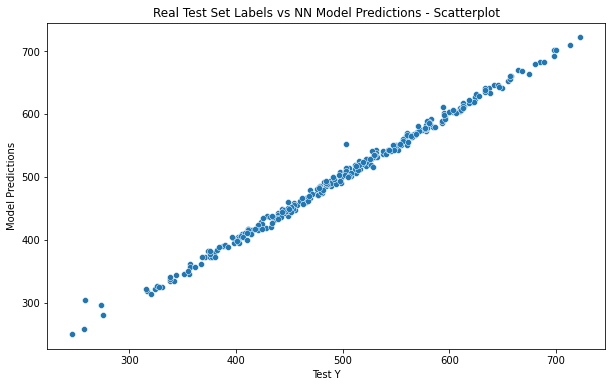

In [37]:
plt.figure(figsize = (10,6))

sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)
plt.title('Real Test Set Labels vs NN Model Predictions - Scatterplot')

In [38]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']    # Prediction Error Computation

C:\Users\franc\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

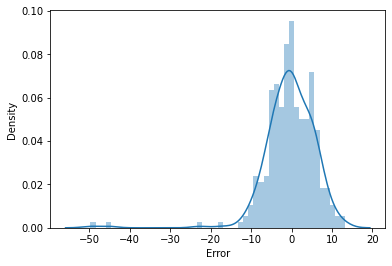

In [39]:
sns.distplot(pred_df['Error'],bins=50)                                 # Prediction Error Distribution

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])         # Prediction Error MAE

4.345170387998135

In [42]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])          # Prediction Error MSE

41.4261798046435

In [43]:
# Essentially the same thing, difference just due to precision
test_score

41.42617045084636

In [44]:
test_score**0.5                                                             # Prediction Error RMSE

6.436316528174042

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [45]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [46]:
# Don't forget to standardize the new input!
new_gem = scaler.transform(new_gem)

In [47]:
model.predict(new_gem)

array([[419.3304]], dtype=float32)

## Saving and Loading a Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save('my_model.h5')                          # Creates a HDF5 file 'my_model.h5'

In [50]:
saved_model = load_model('my_model.h5')

In [51]:
saved_model.predict(new_gem)

array([[419.3304]], dtype=float32)